In [0]:
#imports
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [0]:
#define model
class MiniVGG:
  @staticmethod
  def build(width, height, depth, classes):
    
    chanDim = -1
    
    inputs = tf.keras.layers.Input(shape=(width, height, depth))
    
    x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(inputs)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
    
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
    x = tf.keras.layers.Lambda(lambda t: tf.nn.crelu(x))(x)
    x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    x = tf.keras.layers.Lambda(lambda t: tf.nn.crelu(x))(x)
    x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
    
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    x = tf.keras.layers.Lambda(lambda t: tf.nn.crelu(x))(x)
    x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512)(x)
    x = tf.keras.layers.Lambda(lambda t: tf.nn.crelu(x))(x)
    x = tf.keras.layers.BatchNormalization(axis=chanDim)(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    
    x = tf.keras.layers.Dense(classes)(x)
    x = tf.keras.layers.Activation('softmax')(x)
    
    model = tf.keras.models.Model(inputs, x, name="minivgg")
    
    return model

In [0]:
#model summary
vgg = MiniVGG.build(32, 32, 3, 10)
vgg.summary()

Model: "minivgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
lambda_4 (Lambda)            (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256 

In [0]:
#load data
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [0]:
#compile model
opt = tf.keras.optimizers.Adam(lr=0.01, decay=0.01/10, beta_1=0.9, beta_2=0.999)
vgg.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = vgg.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 395us/sample - loss: 1.6779 - acc: 0.4612 - val_loss: 1.1592 - val_acc: 0.5908
Epoch 2/10
50000/50000 [==============================] - 20s 395us/sample - loss: 1.0202 - acc: 0.6411 - val_loss: 0.8534 - val_acc: 0.6935
Epoch 3/10
50000/50000 [==============================] - 20s 392us/sample - loss: 0.8204 - acc: 0.7114 - val_loss: 0.7342 - val_acc: 0.7428
Epoch 4/10
50000/50000 [==============================] - 20s 394us/sample - loss: 0.6816 - acc: 0.7613 - val_loss: 0.6840 - val_acc: 0.7597
Epoch 5/10
50000/50000 [==============================] - 20s 393us/sample - loss: 0.5693 - acc: 0.8003 - val_loss: 0.6251 - val_acc: 0.7852
Epoch 6/10
50000/50000 [==============================] - 20s 393us/sample - loss: 0.4749 - acc: 0.8350 - val_loss: 0.6423 - val_acc: 0.7890
Epoch 7/10
50000/50000 [==============================] - 20s 390us/sample - loss: 0.3994 - acc: 0.8607 

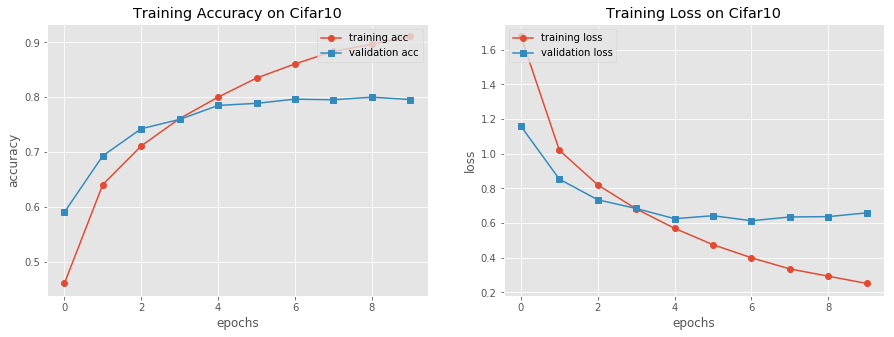

In [0]:
#plot model - save also
plt.style.use("ggplot")
plt.figure(1, figsize=(15, 5))

plt.subplot(121)

plt.plot(np.arange(0, 10), history.history["acc"], label="training acc", marker="o", linestyle="-")
plt.plot(np.arange(0, 10), history.history["val_acc"], label="validation acc", marker="s", linestyle="-")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.title("Training Accuracy on Cifar10")

plt.subplot(122)
plt.plot(np.arange(0, 10), history.history["loss"], label="training loss", marker="o", linestyle="-")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="validation loss", marker="s", linestyle="-")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.title("Training Loss on Cifar10")
plt.savefig("plot.png")
plt.show()

ref: https://www.pyimagesearch.com/2018/10/08/keras-vs-tensorflow-which-one-is-better-and-which-one-should-i-learn/